# Python 與機器學習（2）

## 郭耀仁

## 機器學習基石

- Adaptive Linear Neurons（Adaline）
- 成本函數（Cost Function）
- 梯度遞減（Gradient Descent）

## Adaline

- 不看 **Quantizer** 的話跟 **Linear Regression** 完全相同

![adaline](https://storage.googleapis.com/py_ml_images/adaline.png)

## 成本函數

- 機器學習的演算法都會定義一個目標（Objective）
- 這個目標是最小化**成本函數**：

$$J(w) = \frac{1}{2}\sum(y_i - \phi(z_i))^2$$

## 梯度遞減

- 與感知器學習相仿，我們希望可以讓成本函數慢慢減低，逼近所謂的 *local/global minimum*

$$\Delta w = - \eta \Delta J(w)$$

$$\Delta J(w) = \frac{\partial J}{\partial w_i} = - \sum(y_i - \phi(z_i))x_i$$

![gradient descent](https://storage.googleapis.com/py_ml_images/gd.png)

In [1]:
# 建立一個 AdalineGD 類別
import numpy as np

class AdalineGD:
    def __init__(self, eta, n_epoch):
        self.eta = eta
        self.n_epoch = n_epoch
        
    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1]) # 1 給 w_0, X.shape[1] 給 w_1~w_n
        self.costs = []
        
        for i in range(self.n_epoch):
            output = self.net_input(X)
            errors = y - output
            self.weights[1:] += self.eta * np.dot(X.T, errors)
            self.weights[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.costs.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(self.weights[1:], X.T) + self.weights[0] # (1, 2) dot (2, 100)
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1) # Quantizer here

In [2]:
# 建立一個 AdalineGD 類別（2）
import numpy as np
from sklearn.datasets import load_iris

# AdalineGD here
# ...

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)
ada1 = AdalineGD(eta = 0.01, n_epoch = 10) # 較大的 Learning Rate
ada1.fit(X, y)
print(ada1.costs)

[50.0, 2230.8539602549999, 3475977.0425619674, 5423372722.5878315, 8461791557634.3311, 13202470134517624.0, 2.0599091394023023e+19, 3.2139634624124605e+22, 5.0145712449819432e+25, 7.8239609955381275e+28]


In [3]:
# 建立一個 AdalineGD 類別（3）

ada2 = AdalineGD(eta = 0.0001, n_epoch = 10) # 較小的 Learning Rate
ada2.fit(X, y)
print(ada2.costs)

[50.0, 48.069162686025493, 46.756247850736642, 45.675881529053832, 44.6913293479668, 43.753888361923508, 42.846027487584522, 41.961257613784404, 41.097004964113069, 40.252087948337085]


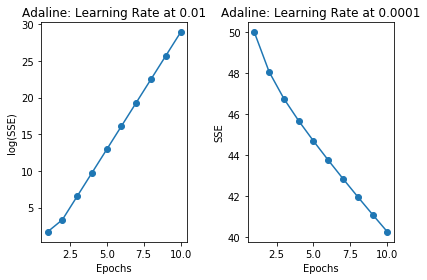

In [4]:
# 建立一個 AdalineGD 類別（4）

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(1, len(ada1.costs) + 1), np.log10(ada1.costs), marker = "o")
plt.xlabel("Epochs")
plt.ylabel("log(SSE)")
plt.title("Adaline: Learning Rate at 0.01")
plt.subplot(1, 2, 2)
plt.plot(range(1, len(ada2.costs) + 1), ada2.costs, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.title("Adaline: Learning Rate at 0.0001")
plt.tight_layout()
plt.show()

## 建立一個 AdalineGD 類別（5）

![gradient descent](https://storage.googleapis.com/py_ml_images/gd2.png)